### Setup

In [ ]:
using Pkg

Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

In [8]:
using Dragoon
using Plots

In [28]:
#number of discs in the booster
n = 20

#initial disc configuration
#findpeak tries to find an equidistant configuration with a peak at f
initdist = findpeak(22.025e9,n)

#generate frequencies for calculation and for plotting
freqs = genFreqs(22.025e9,50e6; length=10) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

#initialize physical properties of the booster
booster = AnalyticalBooster(initdist)
#=
Booster(
    pos,              disc positions
    ndisk,            disc number
    thickness,        disc thickness
    epsilon,          disc epsilon
    vmotor,           motor speed
    maxlength,        maximum allowed booster length (not implemented yet)
    timestamp,        booster operation time
    summedtraveltime, summed motor operation time
    codetimestamp     code runtime
)
=#

#initialize storage of measurements
hist = initHist(booster,10000,freqs,ObjAnalytical)
#                           ^ length, should be at least the larger of (n^2, search steps)
;

Objective Value: -243.3, Timestamp: 2023-06-19T08:52:40.086


In [24]:
p = zeros(booster.ndisk)
g = zeros(booster.ndisk)
h = zeros(booster.ndisk,booster.ndisk)

updateHist!(booster,hist,freqs,ObjAnalytical)

deriv = Derivator2(1e-5,1e-6,"double")

deriv.func(g,h,booster,hist,freqs,ObjAnalytical,deriv.args)

display(h)

20×20 Matrix{Float64}:
 -1.13652e13  -5.17149e9   -6.66812e9   …  -1.53564e9   -3.26113e9
 -5.17149e9   -4.10286e12  -7.60794e9      -1.87565e9   -3.82256e9
 -6.66812e9   -7.60794e9   -4.24792e12     -2.05048e9   -3.99158e9
 -7.43909e9   -8.44713e9   -8.48817e9      -2.01767e9   -3.71884e9
 -7.35717e9   -8.31262e9   -8.30117e9      -1.76081e9   -3.0116e9
 -6.40487e9   -7.18964e9   -7.12067e9   …  -1.29232e9   -1.93355e9
 -4.6775e9    -5.19181e9   -5.06757e9      -6.52286e8   -5.97445e8
 -2.3722e9    -2.54791e9   -2.37794e9       9.60997e7    8.48651e8
  2.3615e8     4.2614e8     6.2603e8        8.74156e8    2.23993e9
  2.82979e9    3.36746e9    3.57706e9       1.59736e9    3.41603e9
  5.08978e9    5.91385e9    6.11113e9   …   2.18599e9    4.24218e9
  6.73923e9    7.75299e9    7.91695e9       2.5754e9     4.62737e9
  7.58193e9    8.66594e9    8.7794e9        2.72461e9    4.53673e9
  7.53004e9    8.55816e9    8.6099e9        2.62189e9    3.99624e9
  6.61633e9    7.47258e9    7.45878e9   

In [25]:
inv(h)*g

20-element Vector{Float64}:
 -1.0318792402320894e-7
 -3.3250361266992314e-7
 -3.3167121210828676e-7
 -3.2989356666927495e-7
 -3.2643625576843186e-7
 -3.1847989407413245e-7
 -2.6929342618121707e-7
 -3.6531404484257145e-7
 -3.443987340044967e-7
 -3.386595655370096e-7
 -3.359199818553318e-7
 -3.3444252643455816e-7
 -3.3366968346554885e-7
 -3.333159180446065e-7
 -3.331475624502485e-7
 -3.327383406886271e-7
 -3.280598146430252e-7
 -3.388916508648977e-7
 -3.3694043255026e-7
 -3.362631397770658e-7

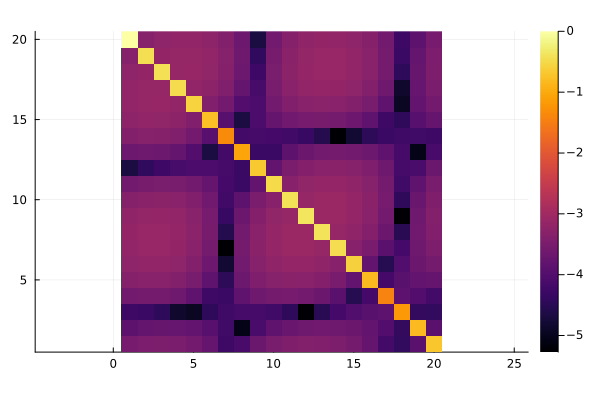

In [19]:
hmax = maximum(abs.(h))
h ./ hmax
heatmap(1:20,1:20,log10.(abs.(reverse(h; dims=1) ./ hmax; )); aspectratio=:equal)

In [6]:
import LinearAlgebra: cholesky
inv(h)

20×20 Matrix{Float64}:
 -8.79879e-14   1.10579e-16   1.37861e-16  …   7.95343e-17   1.25626e-16
  1.10579e-16  -2.43734e-13   4.36189e-16      2.69294e-16   4.08347e-16
  1.37861e-16   4.36189e-16  -2.35411e-13      2.84225e-16   4.11818e-16
  1.66828e-16   5.2531e-16    5.09787e-16      3.02947e-16   4.15747e-16
  2.06603e-16   6.47304e-16   6.24251e-16      3.30501e-16   4.20994e-16
  2.87746e-16   8.95631e-16   8.56573e-16  …   3.86926e-16   4.3103e-16
  7.89665e-16   2.43007e-15   2.29007e-15      7.26765e-16   4.89708e-16
 -2.01459e-16  -5.99379e-16  -5.39375e-16      6.52479e-17   3.75998e-16
  1.0343e-17    4.81312e-17   6.55383e-17      2.12422e-16   4.01497e-16
  6.89461e-17   2.27299e-16   2.32933e-16      2.58225e-16   4.09698e-16
  1.0046e-16    3.23603e-16   3.22856e-16  …   2.87888e-16   4.15396e-16
  1.23262e-16   3.93199e-16   3.87732e-16      3.1473e-16    4.21036e-16
  1.43524e-16   4.54902e-16   4.45078e-16      3.44747e-16   4.27863e-16
  1.65265e-16   5.20884e-16  

### Optimizer

In [ ]:
#=
how to use

linesearch(                     directly modifies booster.pos
    booster,                    
    hist,                       
    freqs,                      frequency range to optimize on
    α,                          base step length e.g. motorspeed*measurementfrequency
    (objective,[options]),      objective function
    (solver,[options]),         provides step direction p
    (derivative,[options]),     provides derivatives for use by solver
    (step,[options]),           calculates steplength
    (search,[options]),         search mode
    (unstuckinator,[options]);  tries to unstuck system from bad local minima
    ϵgrad=0,                    terminate if norm(gradient) falls below this value,
    maxiter=100,                maximum allowed iterations,
    showtrace=false,            wether to print progress,
    showevery=1,                only print every i iterations,
    unstuckisiter=true          wether an unstucking iteration counts towards maxiter
                                    warning! can run endlessly if false
)

returns trace, access with
trace[iteration].x      disc position
                .obj    objective value
                .g      gradient
                .h      hessian
                .t      timestamp
                .T      summed travel time
=#

In [32]:
trace = linesearch(booster,hist,freqs,-booster.vmotor*1e-6,
                    ObjAnalytical,
                    SolverNewton("inv"),
                    Derivator2(1e-9,1e-9,"double"),
                    StepNorm("unit"),
                    SearchExtendedSteps(2000),
                    UnstuckDont;
                    ϵgrad=0.,maxiter=Int(2e1),showtrace=true);

20-element Vector{Float64}:
       1.172710855186665e6
       1.3634321812645565e6
       1.4093475108296615e6
       1.2952092872779984e6
       1.0266712708784097e6
  629859.8423910561
  148147.32183765498
 -363440.33081547875
 -845422.8404417563
      -1.2416917559363581e6
      -1.506895574962641e6
      -1.612377116273933e6
      -1.549853850676186e6
      -1.3323429590883506e6
 -992210.7374649157
 -576621.2010058779
 -141015.27892762533
  258478.43583903793
  572655.6180718489
  765824.253889491

20×20 Matrix{Float64}:
 -4.28397e15  -5.15587e9   -6.65867e9   …  -1.53437e9   -3.26148e9
 -5.15587e9   -4.09031e15  -7.58936e9      -1.87373e9   -3.82178e9
 -6.65867e9   -7.58936e9   -4.22806e15     -2.04815e9   -3.98742e9
 -7.42867e9   -8.43133e9   -8.45526e9      -2.01283e9   -3.70761e9
 -7.33624e9   -8.28496e9   -8.26236e9      -1.7524e9    -2.9911e9
 -6.37132e9   -7.14823e9   -7.06871e9   …  -1.27903e9   -1.90269e9
 -4.6262e9    -5.13083e9   -4.99816e9      -6.33747e8   -5.58003e8
 -2.311e9     -2.47636e9   -2.30179e9       1.19542e8    8.92783e8
  3.01867e8    4.99767e8    6.99259e8       9.00883e8    2.28303e9
  2.88895e9    3.4305e9     3.63548e9       1.62387e9    3.45344e9
  5.13063e9    5.95566e9    6.14472e9   …   2.2093e9     4.27005e9
  6.75823e9    7.77061e9    7.92346e9       2.5934e9     4.64519e9
  7.5826e9     8.66194e9    8.764e9         2.73656e9    4.54602e9
  7.5203e9     8.54402e9    8.5841e9        2.62841e9    3.99947e9
  6.60475e9    7.45658e9    7.43293e9   

Gradient norm: 4.7e6

20-element Vector{Float64}:
       1.1728674619320144e6
       1.3637788860023646e6
       1.4097967136308397e6
       1.2957120180061564e6
       1.0271695847592354e6
  630294.4407678979
  148465.22296352303
 -363277.76429345703
 -845436.5534333873
      -1.2418805942076005e6
      -1.5072370316602245e6
      -1.612830208458149e6
      -1.550364624918643e6
      -1.33285159105867e6
 -992659.452265343
 -576961.8023379053
 -141215.3318796072
  258431.6253688712
  572753.7966606632
  766039.8475337615

20×20 Matrix{Float64}:
 -4.28465e15  -5.16764e9   -6.65909e9   …  -1.53449e9   -3.26193e9
 -5.16764e9   -4.09135e15  -7.60048e9      -1.87444e9   -3.82272e9
 -6.65909e9   -7.60048e9   -4.22941e15     -2.0479e9    -3.98848e9
 -7.42702e9   -8.43255e9   -8.46214e9      -2.01339e9   -3.70926e9
 -7.33647e9   -8.288e9     -8.26347e9      -1.75331e9   -2.99244e9
 -6.36834e9   -7.14866e9   -7.06868e9   …  -1.27926e9   -1.904e9
 -4.62859e9   -5.13586e9   -5.00424e9      -6.34145e8   -5.58799e8
 -2.3085e9    -2.4782e9    -2.30497e9       1.18945e8    8.92243e8
  2.99622e8    4.9576e8     6.98208e8       9.00286e8    2.28312e9
  2.8862e9     3.42885e9    3.63627e9       1.6237e9     3.45366e9
  5.12958e9    5.95554e9    6.14872e9   …   2.20936e9    4.27096e9
  6.75846e9    7.77101e9    7.92789e9       2.59334e9    4.6461e9
  7.58382e9    8.66422e9    8.76867e9       2.73675e9    4.54693e9
  7.52075e9    8.54473e9    8.58793e9       2.62901e9    4.00061e9
  6.60677e9    7.45848e9    7.43646e9     


Iter: 1, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.38



Gradient norm: 4.71e6

20-element Vector{Float64}:
       1.1730240100149557e6
       1.3641255442138345e6
       1.4102458844860166e6
       1.2962147440305215e6
       1.0276679202547711e6
  630729.0927338726
  148783.17038835573
 -363115.11576059274
 -845450.1873558229
      -1.2420693726369336e6
      -1.5075784297522432e6
      -1.6132832768249726e6
      -1.5508753864850176e6
      -1.333360238845671e6
 -993108.1999354773
 -577302.4501962708
 -141415.43385903788
  258384.76760497995
  572851.937846508
  766255.4205296601

20×20 Matrix{Float64}:
 -4.28534e15  -5.16036e9   -6.66125e9   …  -1.53412e9   -3.2621e9
 -5.16036e9   -4.09239e15  -7.60804e9      -1.87387e9   -3.82349e9
 -6.66125e9   -7.60804e9   -4.23076e15     -2.04776e9   -3.98967e9
 -7.42966e9   -8.43517e9   -8.46143e9      -2.01339e9   -3.71062e9
 -7.33894e9   -8.29033e9   -8.26941e9      -1.75314e9   -2.99403e9
 -6.37172e9   -7.15247e9   -7.07439e9   …  -1.28028e9   -1.90533e9
 -4.62802e9   -5.13396e9   -5.0006e9       -6.34714e8   -5.59965e8
 -2.31091e9   -2.47903e9   -2.30537e9       1.1886e8     8.91447e8
  3.02038e8    4.99227e8    6.99174e8       8.99547e8    2.28266e9
  2.88773e9    3.42982e9    3.63553e9       1.62254e9    3.45358e9
  5.13066e9    5.95674e9    6.14853e9   …   2.20871e9    4.27116e9
  6.75905e9    7.77436e9    7.92937e9       2.59331e9    4.64701e9
  7.58484e9    8.66777e9    8.77154e9       2.7369e9     4.54793e9
  7.52368e9    8.55016e9    8.59188e9       2.62912e9    4.00169e9
  6.60788e9    7.46249e9    7.44024e9   


Iter: 2, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.458



Gradient norm: 4.71e6


20-element Vector{Float64}:
       1.1731804877399553e6
       1.3644721515078116e6
       1.4106950265357909e6
       1.296717463944219e6
       1.0281662831488347e6
  631163.77350525
  149101.19531919007
 -362952.4103985204
 -845463.7429053945
      -1.2422580778377322e6
      -1.5079197779783725e6
      -1.613736310588365e6
      -1.5513861445413113e6
      -1.3338688975323974e6
 -993556.9808305899
 -577643.143785167
 -141615.5869975455
  258337.8609557485
  572950.043988385
  766470.9719108486

20×20 Matrix{Float64}:
 -4.28602e15  -5.16164e9   -6.66233e9   …  -1.53403e9   -3.26239e9
 -5.16164e9   -4.09343e15  -7.6015e9       -1.87396e9   -3.82428e9
 -6.66233e9   -7.6015e9    -4.23211e15     -2.04841e9   -3.99066e9
 -7.43026e9   -8.43784e9   -8.46384e9      -2.01371e9   -3.71159e9
 -7.34224e9   -8.29641e9   -8.27507e9      -1.75439e9   -2.99519e9
 -6.37525e9   -7.1569e9    -7.07863e9   …  -1.2806e9    -1.90641e9
 -4.6324e9    -5.142e9     -5.00657e9      -6.3514e8    -5.60476e8
 -2.31122e9   -2.48048e9   -2.30722e9       1.17637e8    8.91276e8
  2.98996e8    4.96044e8    6.9673e8        8.99092e8    2.28295e9
  2.88765e9    3.43093e9    3.63769e9       1.62274e9    3.45398e9
  5.13216e9    5.95819e9    6.15009e9   …   2.20865e9    4.27212e9
  6.76147e9    7.77558e9    7.93167e9       2.59328e9    4.6484e9
  7.58769e9    8.66984e9    8.77588e9       2.73724e9    4.54969e9
  7.5247e9     8.55141e9    8.59481e9       2.6296e9     4.00308e9
  6.61043e9    7.46476e9    7.44365e9   

Iter: 3, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.536



Gradient norm: 4.71e6


20-element Vector{Float64}:
       1.1733369017434823e6
       1.3648187079695617e6
       1.4111441480082476e6
       1.297220177065128e6
       1.0286646682828859e6
  631598.5102958166
  149419.28198197728
 -362789.62980418326
 -845477.2254111731
      -1.242446721406054e6
      -1.5082610710805964e6
      -1.6141893103309711e6
      -1.551896892095783e6
      -1.3343775734568906e6
 -994005.7945811986
 -577983.881797195
 -141815.79081196105
  258290.90766649187
  573048.1101409168
  766686.5029847258

20×20 Matrix{Float64}:
 -4.28671e15  -5.16673e9   -6.66404e9   …  -1.53366e9   -3.26301e9
 -5.16673e9   -4.09447e15  -7.60582e9      -1.8739e9    -3.82522e9
 -6.66404e9   -7.60582e9   -4.23345e15     -2.04801e9   -3.99186e9
 -7.43125e9   -8.43718e9   -8.46887e9      -2.01391e9   -3.7129e9
 -7.3442e9    -8.29507e9   -8.27478e9      -1.75388e9   -2.99644e9
 -6.37647e9   -7.15795e9   -7.08053e9   …  -1.28048e9   -1.90772e9
 -4.63598e9   -5.14453e9   -5.01038e9      -6.35822e8   -5.61784e8
 -2.31762e9   -2.48608e9   -2.31122e9       1.17609e8    8.9031e8
  2.97291e8    4.9468e8     6.97156e8       8.98979e8    2.28243e9
  2.88472e9    3.42939e9    3.63789e9       1.62251e9    3.45437e9
  5.13197e9    5.95904e9    6.15242e9   …   2.20871e9    4.27292e9
  6.75976e9    7.77641e9    7.93349e9       2.59337e9    4.64888e9
  7.58672e9    8.67121e9    8.77776e9       2.73693e9    4.55049e9
  7.52678e9    8.55448e9    8.59814e9       2.63003e9    4.00436e9
  6.61191e9    7.468e9      7.4474e9     

Iter: 4, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.614



Gradient norm: 4.71e6


20-element Vector{Float64}:
       1.1734932441527233e6
       1.3651652077442121e6
       1.4115932360709847e6
       1.2977228794994743e6
       1.0291630831034125e6
  632033.2849725218
  149737.42841561942
 -362626.7699132768
 -845490.6377295401
      -1.242635284867788e6
      -1.508602317855434e6
      -1.61464228584407e6
      -1.5524076288215837e6
      -1.3348862618443035e6
 -994454.6397235853
 -578324.666548724
 -142016.0457712427
  258243.90610296174
  573146.1399989257
  766902.013126014

20×20 Matrix{Float64}:
 -4.28739e15  -5.16127e9   -6.66398e9  -7.43304e9  …  -1.53318e9   -3.26327e9
 -5.16127e9   -4.09551e15  -7.60588e9  -8.44292e9     -1.87359e9   -3.82576e9
 -6.66398e9   -7.60588e9   -4.2348e15  -8.46853e9     -2.04781e9   -3.99282e9
 -7.43304e9   -8.44292e9   -8.46853e9  -3.8932e15     -2.01359e9   -3.71438e9
 -7.34494e9   -8.29968e9   -8.27742e9  -7.2603e9      -1.75402e9   -2.9975e9
 -6.37752e9   -7.15951e9   -7.08269e9  -6.1334e9   …  -1.28159e9   -1.90892e9
 -4.63504e9   -5.1453e9    -5.01404e9  -4.24805e9     -6.36135e8   -5.62636e8
 -2.31725e9   -2.48517e9   -2.31051e9  -1.82212e9      1.17325e8    8.8977e8
  2.99138e8    4.93912e8    6.96787e8   8.54783e8      8.98353e8    2.28238e9
  2.88432e9    3.4297e9     3.63821e9   3.44929e9      1.62237e9    3.45486e9
  5.12986e9    5.95941e9    6.15225e9   5.64361e9  …   2.20857e9    4.27349e9
  6.76101e9    7.77936e9    7.93591e9   7.17e9         2.59337e9    4.64999e9
  7.58928e9    8.67601e9    8.78151e9   7.8

Iter: 5, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.692



Gradient norm: 4.71e6


20-element Vector{Float64}:
       1.173649518037223e6
       1.3655116587329984e6
       1.4120422874270843e6
       1.29822559256354e6
       1.0296615037930222e6
  632468.1067155779
  150055.65505532557
 -362463.84404137183
 -845503.9678807452
      -1.2428237963177934e6
      -1.5089435107711323e6
      -1.6150952231583914e6
      -1.552918361753086e6
      -1.3353949645136253e6
 -994903.519398349
 -578665.4967465665
 -142216.35053957015
  258196.85666306212
  573244.1337329419
  767117.5015389053

20×20 Matrix{Float64}:
 -4.28808e15  -5.16738e9   -6.66751e9   …  -1.53352e9   -3.26344e9
 -5.16738e9   -4.09655e15  -7.60335e9      -1.87424e9   -3.82681e9
 -6.66751e9   -7.60335e9   -4.23615e15     -2.04912e9   -3.9941e9
 -7.43987e9   -8.44398e9   -8.47629e9      -2.0149e9    -3.71557e9
 -7.34832e9   -8.29928e9   -8.28422e9      -1.75547e9   -2.99934e9
 -6.38477e9   -7.16454e9   -7.09016e9   …  -1.28253e9   -1.91005e9
 -4.63868e9   -5.14635e9   -5.01706e9      -6.37215e8   -5.63574e8
 -2.31898e9   -2.48829e9   -2.31645e9       1.16557e8    8.89344e8
  2.94648e8    4.95078e8    6.92665e8       8.97444e8    2.28221e9
  2.88463e9    3.43064e9    3.63619e9       1.62137e9    3.4548e9
  5.12946e9    5.96049e9    6.15222e9   …   2.20751e9    4.27411e9
  6.76201e9    7.78039e9    7.93912e9       2.59308e9    4.65121e9
  7.59027e9    8.67831e9    8.78381e9       2.73735e9    4.55302e9
  7.52894e9    8.56042e9    8.6049e9        2.63017e9    4.00684e9
  6.61413e9    7.4732e9     7.45197e9    

Iter: 6, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.77



Gradient norm: 4.71e6


20-element Vector{Float64}:
       1.173805728598154e6
       1.3658580672739616e6
       1.4124913140705074e6
       1.2987282894556527e6
       1.0301599570397001e6
  632902.9711906741
  150373.92778083356
 -362300.8369117997
 -845517.2294219437
      -1.2430122328055403e6
      -1.5092846553983463e6
      -1.6155481278445905e6
      -1.5534290816958672e6
      -1.3359036828859416e6
 -995352.4300101434
 -579006.3740533923
 -142416.7070211979
  258149.76122262576
  573342.0897797714
  767332.9696160635

20×20 Matrix{Float64}:
 -4.28876e15  -5.17133e9   -6.66344e9   …  -1.53267e9   -3.26366e9
 -5.17133e9   -4.09759e15  -7.61145e9      -1.8733e9    -3.82767e9
 -6.66344e9   -7.61145e9   -4.23749e15     -2.04813e9   -3.99481e9
 -7.43415e9   -8.44392e9   -8.48635e9      -2.01433e9   -3.71659e9
 -7.34931e9   -8.30576e9   -8.28712e9      -1.75493e9   -3.00034e9
 -6.38028e9   -7.16491e9   -7.08877e9   …  -1.28225e9   -1.91136e9
 -4.63913e9   -5.15172e9   -5.02303e9      -6.36931e8   -5.64512e8
 -2.31651e9   -2.48886e9   -2.31594e9       1.16131e8    8.88519e8
  2.9479e8     4.92435e8    6.9204e8        8.97757e8    2.28226e9
  2.88415e9    3.4299e9     3.63656e9       1.62117e9    3.45509e9
  5.13108e9    5.96287e9    6.15518e9   …   2.20797e9    4.27468e9
  6.76326e9    7.78277e9    7.94165e9       2.59399e9    4.65207e9
  7.5924e9     8.68039e9    8.78785e9       2.73792e9    4.55429e9
  7.53073e9    8.56255e9    8.60845e9       2.63074e9    4.00831e9
  6.61689e9    7.47525e9    7.45547e9  

Iter: 7, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.848



Gradient norm: 4.71e6


20-element Vector{Float64}:
       1.1739618717712117e6
       1.3662044159161723e6
       1.4129403086116097e6
       1.2992309944479528e6
       1.030658418315511e6
  633337.8974261449
  150692.26361674737
 -362137.760674841
 -845530.4106291805
      -1.243200618759488e6
      -1.509625735479858e6
      -1.6160010025885184e6
      -1.553939798853321e6
      -1.3364124135790688e6
 -995801.3764617135
 -579347.2934243482
 -142617.11321239543
  258102.6157315591
  573440.0095036562
  767548.4154816559

20×20 Matrix{Float64}:
 -4.28944e15  -5.16044e9   -6.66236e9   …  -1.53207e9   -3.26381e9
 -5.16044e9   -4.09863e15  -7.60429e9      -1.87293e9   -3.82803e9
 -6.66236e9   -7.60429e9   -4.23884e15     -2.04824e9   -3.99575e9
 -7.43634e9   -8.45083e9   -8.49283e9      -2.0145e9    -3.71773e9
 -7.34772e9   -8.30619e9   -8.28604e9      -1.75567e9   -3.00153e9
 -6.37894e9   -7.16722e9   -7.09051e9   …  -1.2829e9    -1.91213e9
 -4.63953e9   -5.1518e9    -5.02123e9      -6.37499e8   -5.65421e8
 -2.32001e9   -2.4896e9    -2.31674e9       1.15563e8    8.88321e8
  2.95842e8    4.91411e8    6.92296e8       8.96989e8    2.28232e9
  2.88583e9    3.42962e9    3.63926e9       1.62149e9    3.4558e9
  5.13123e9    5.96376e9    6.15765e9   …   2.20791e9    4.27579e9
  6.76397e9    7.78317e9    7.94304e9       2.5934e9     4.65334e9
  7.59411e9    8.68235e9    8.79103e9       2.73846e9    4.55597e9
  7.53431e9    8.5665e9     8.61297e9       2.63151e9    4.00968e9
  6.61842e9    7.47963e9    7.46059e9   

Iter: 8, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -243.926



Gradient norm: 4.71e6


20-element Vector{Float64}:
       1.1741179479543006e6
       1.3665507107134543e6
       1.4133892808985137e6
       1.2997336857836216e6
       1.0311569065066805e6
  633772.8618746041
  151010.66959744002
 -361974.6211001029
 -845543.515467284
      -1.243388917302468e6
      -1.509966776026772e6
      -1.6164538485128332e6
      -1.5544504998530326e6
      -1.3369211586677919e6
 -996250.3527845001
 -579688.2619080179
 -142817.56868683713
  258055.4247515465
  573537.890019793
  767763.8411820453

20×20 Matrix{Float64}:
 -4.29013e15  -5.16934e9   -6.66608e9   …  -1.53244e9  -3.26406e9
 -5.16934e9   -4.09966e15  -7.61059e9      -1.87296e9  -3.82869e9
 -6.66608e9   -7.61059e9   -4.24019e15     -2.04858e9  -3.99692e9
 -7.4381e9    -8.45341e9   -8.48195e9      -2.01516e9  -3.71926e9
 -7.35309e9   -8.31295e9   -8.29579e9      -1.75618e9  -3.00295e9
 -6.38624e9   -7.17233e9   -7.09818e9   …  -1.28361e9  -1.91312e9
 -4.63962e9   -5.15257e9   -5.02519e9      -6.38238e8  -5.6616e8
 -2.32177e9   -2.49335e9   -2.32021e9       1.15307e8   8.87638e8
  2.93937e8    4.90871e8    6.90676e8       8.96506e8   2.28178e9
  2.88421e9    3.43078e9    3.63875e9       1.62021e9   3.4558e9
  5.13117e9    5.9658e9     6.15876e9   …   2.20737e9   4.2765e9
  6.76496e9    7.78752e9    7.94716e9       2.59314e9   4.65442e9
  7.59326e9    8.68525e9    8.79396e9       2.73843e9   4.55717e9
  7.53403e9    8.57003e9    8.61556e9       2.63179e9   4.01113e9
  6.6195e9     7.4825e9     7.46383e9       2.29363e9   

Iter: 9, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.004



Gradient norm: 4.72e6


20-element Vector{Float64}:
       1.1742739523015188e6
       1.3668969546358767e6
       1.4138382183404018e6
       1.300236374902397e6
       1.031655422877975e6
  634207.8524141925
  151329.140692269
 -361811.38547419774
 -845556.5541112263
      -1.243577158163589e6
      -1.5103077562628186e6
      -1.6169066634290628e6
      -1.554961199033755e6
      -1.337429916588917e6
 -996699.3619769936
 -580029.2731663603
 -143018.0777077794
  258008.18725940643
  573635.7340992981
  767979.245821948

20×20 Matrix{Float64}:
 -4.29081e15  -5.16158e9  -6.66958e9   …  -1.53196e9  -3.26432e9
 -5.16158e9   -4.1007e15  -7.61338e9      -1.87316e9  -3.8298e9
 -6.66958e9   -7.61338e9  -4.24153e15     -2.04838e9  -3.99777e9
 -7.44339e9   -8.45304e9  -8.48513e9      -2.01507e9  -3.72032e9
 -7.35352e9   -8.31298e9  -8.2959e9       -1.75621e9  -3.00378e9
 -6.38875e9   -7.17608e9  -7.10173e9   …  -1.28392e9  -1.9146e9
 -4.64425e9   -5.1588e9   -5.02965e9      -6.38664e8  -5.66956e8
 -2.327e9     -2.49682e9  -2.32473e9       1.14227e8   8.87184e8
  2.89276e8    4.87717e8   6.88516e8       8.95824e8   2.28175e9
  2.88165e9    3.42817e9   3.63605e9       1.62058e9   3.45645e9
  5.1308e9     5.96339e9   6.15788e9   …   2.20768e9   4.27747e9
  6.76479e9    7.78715e9   7.94734e9       2.59345e9   4.65579e9
  7.59488e9    8.6859e9    8.79589e9       2.73829e9   4.55827e9
  7.53596e9    8.57213e9   8.61905e9       2.63211e9   4.01263e9
  6.62044e9    7.48386e9   7.46607e9       2.29383e9   3.10052e9
  4.

Iter: 10, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.082



Gradient norm: 4.72e6


20-element Vector{Float64}:
       1.174429896096285e6
       1.3672431565368015e6
       1.4142871260958144e6
       1.3007390643338112e6
       1.0321539561175541e6
  634642.9026820032
  151647.66077191415
 -361648.09378647077
 -845569.5103890548
      -1.2437653261230253e6
      -1.5106486883382786e6
      -1.6173594457455918e6
      -1.5554718845294246e6
      -1.3379386894030175e6
 -997148.405517123
 -580370.3308373542
 -143218.63464772375
  257960.90002927484
  573733.5417421719
  768194.6287476649

20×20 Matrix{Float64}:
 -4.29149e15  -5.16806e9   -6.6685e9    …  -1.53165e9   -3.26503e9
 -5.16806e9   -4.10174e15  -7.61295e9      -1.87282e9   -3.83076e9
 -6.6685e9    -7.61295e9   -4.24288e15     -2.04861e9   -3.99956e9
 -7.44154e9   -8.45637e9   -8.49585e9      -2.01558e9   -3.72182e9
 -7.35363e9   -8.31599e9   -8.29837e9      -1.75672e9   -3.00594e9
 -6.38966e9   -7.17824e9   -7.10497e9   …  -1.28449e9   -1.91616e9
 -4.64462e9   -5.15658e9   -5.03249e9      -6.39659e8   -5.68804e8
 -2.32328e9   -2.49568e9   -2.32473e9       1.13829e8    8.86246e8
  2.91976e8    4.90957e8    6.90306e8       8.95511e8    2.28144e9
  2.88156e9    3.43118e9    3.63764e9       1.61967e9    3.45622e9
  5.13259e9    5.96629e9    6.16012e9   …   2.20703e9    4.27758e9
  6.76781e9    7.79067e9    7.95029e9       2.59325e9    4.65624e9
  7.59613e9    8.69085e9    8.79888e9       2.73846e9    4.55893e9
  7.53738e9    8.57554e9    8.62212e9       2.6325e9     4.01312e9
  6.62322e9    7.48864e9    7.47053e9  

Iter: 11, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.16



Gradient norm: 4.72e6


20-element Vector{Float64}:
       1.1745857713378882e6
       1.3675893053743946e6
       1.4147359998872844e6
       1.3012417494167038e6
       1.0326525085275761e6
  635078.003810463
  151966.24991631325
 -361484.7249338027
 -845582.3938930961
      -1.243953434340028e6
      -1.5109895709883857e6
      -1.6178121905312536e6
      -1.5559825680924177e6
      -1.3384474740405492e6
 -997597.4793405839
 -580711.4331872753
 -143419.2435283421
  257913.5664291243
  573831.3108309967
  768409.991081853

20×20 Matrix{Float64}:
 -4.29218e15  -5.16388e9   -6.66697e9   …  -1.53088e9   -3.26474e9
 -5.16388e9   -4.10278e15  -7.61162e9      -1.87217e9   -3.83093e9
 -6.66697e9   -7.61162e9   -4.24423e15     -2.04815e9   -4.00007e9
 -7.44367e9   -8.45836e9   -8.5063e9       -2.01518e9   -3.7227e9
 -7.35398e9   -8.3169e9    -8.30326e9      -1.75606e9   -3.00648e9
 -6.38991e9   -7.17833e9   -7.10747e9   …  -1.28469e9   -1.9167e9
 -4.64533e9   -5.16215e9   -5.03371e9      -6.39119e8   -5.68804e8
 -2.32362e9   -2.49676e9   -2.32467e9       1.14113e8    8.86075e8
  2.89788e8    4.86153e8    6.88289e8       8.95653e8    2.28172e9
  2.88352e9    3.43087e9    3.63937e9       1.62029e9    3.4571e9
  5.1339e9     5.96737e9    6.16257e9   …   2.20768e9    4.27886e9
  6.76826e9    7.79283e9    7.95325e9       2.59413e9    4.65789e9
  7.59843e9    8.69201e9    8.803e9         2.73985e9    4.561e9
  7.53934e9    8.57736e9    8.62596e9       2.6335e9     4.01519e9
  6.62496e9    7.49048e9    7.47346e9       

Iter: 12, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.238



Gradient norm: 4.72e6


20-element Vector{Float64}:
       1.1747415773726287e6
       1.367935396999087e6
       1.4151848456833703e6
       1.301744422988804e6
       1.0331510854655334e6
  635513.1387749679
  152284.9139377058
 -361321.274070292
 -845595.2203405559
      -1.2441414642268e6
      -1.511330396510857e6
      -1.6182649117411072e6
      -1.5564932371745498e6
      -1.3389562752763594e6
 -998046.5879806387
 -581052.5814808897
 -143619.90170641546
  257866.18427048324
  573929.045344812
  768625.3318439639

20×20 Matrix{Float64}:
 -4.29286e15  -5.16786e9   -6.66844e9   …  -1.53094e9   -3.26509e9
 -5.16786e9   -4.10382e15  -7.61821e9      -1.87288e9   -3.83167e9
 -6.66844e9   -7.61821e9   -4.24557e15     -2.04821e9   -4.00087e9
 -7.44404e9   -8.45938e9   -8.49283e9      -2.01581e9   -3.72401e9
 -7.35747e9   -8.32495e9   -8.30747e9      -1.7572e9    -3.00781e9
 -6.3946e9    -7.1872e9    -7.11418e9   …  -1.28531e9   -1.91775e9
 -4.65067e9   -5.1684e9    -5.03962e9      -6.40114e8   -5.6977e8
 -2.32924e9   -2.50242e9   -2.32941e9       1.12948e8    8.85507e8
  2.89049e8    4.82913e8    6.86157e8       8.9517e8     2.28164e9
  2.87955e9    3.42658e9    3.63738e9       1.61907e9    3.45736e9
  5.12992e9    5.96594e9    6.16319e9   …   2.20689e9    4.27954e9
  6.76681e9    7.79357e9    7.95487e9       2.59365e9    4.65849e9
  7.599e9      8.69525e9    8.8057e9        2.73948e9    4.56197e9
  7.54068e9    8.58071e9    8.63034e9       2.63378e9    4.01639e9
  6.62536e9    7.49304e9    7.47642e9   

Iter: 13, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.316



Gradient norm: 4.72e6


20-element Vector{Float64}:
       1.174897316644774e6
       1.3682814390989505e6
       1.415633671371097e6
       1.3022470924681784e6
       1.0336496866187871e6
  635948.3274707145
  152603.62442859332
 -361157.7612758765
 -845607.951674765
      -1.2443294387054492e6
      -1.5116711747253928e6
      -1.6187175962301125e6
      -1.5570038991796763e6
      -1.3394650886624502e6
 -998495.728183002
 -581393.7742829012
 -143820.61240780784
  257818.75629604654
  574026.7410914156
  768840.652341396

20×20 Matrix{Float64}:
 -4.29354e15  -5.15885e9   -6.66722e9   …  -1.5304e9    -3.2652e9
 -5.15885e9   -4.10486e15  -7.61401e9      -1.87273e9   -3.83255e9
 -6.66722e9   -7.61401e9   -4.24692e15     -2.04807e9   -4.00195e9
 -7.44382e9   -8.46504e9   -8.50613e9      -2.01575e9   -3.72509e9
 -7.35776e9   -8.32387e9   -8.3075e9       -1.75751e9   -3.00915e9
 -6.39417e9   -7.18711e9   -7.11293e9   …  -1.28563e9   -1.91909e9
 -4.6482e9    -5.16866e9   -5.03991e9      -6.41023e8   -5.70481e8
 -2.32728e9   -2.50193e9   -2.33155e9       1.12323e8    8.84938e8
  2.89475e8    4.8442e8     6.8664e8        8.94516e8    2.28147e9
  2.88313e9    3.43115e9    3.64005e9       1.61916e9    3.45756e9
  5.13194e9    5.96904e9    6.16546e9   …   2.2066e9     4.27988e9
  6.77045e9    7.79698e9    7.95865e9       2.59368e9    4.65985e9
  7.60002e9    8.69619e9    8.80871e9       2.73923e9    4.56316e9
  7.54247e9    8.58353e9    8.63298e9       2.63358e9    4.01766e9
  6.62902e9    7.49665e9    7.48028e9   

Iter: 14, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.394



Gradient norm: 4.72e6


20-element Vector{Float64}:
       1.1750529912575302e6
       1.3686274365767303e6
       1.4160824586326724e6
       1.3027497572295486e6
       1.0341483085340996e6
  636383.5528730988
  152922.41711506448
 -360994.18292678817
 -845620.6168148128
      -1.2445173368718086e6
      -1.5120119039551127e6
      -1.619170249099966e6
      -1.5575145536956824e6
      -1.3399739159467572e6
 -998944.9014824458
 -581735.0127301778
 -144021.37074398523
  257771.27824255783
  574124.4004013878
  769055.9509399008

20×20 Matrix{Float64}:
 -4.29423e15  -5.16576e9   -6.67407e9   …  -1.53022e9   -3.26571e9
 -5.16576e9   -4.10589e15  -7.62651e9      -1.87259e9   -3.83318e9
 -6.67407e9   -7.62651e9   -4.24827e15     -2.04861e9   -4.00325e9
 -7.44973e9   -8.46666e9   -8.50201e9      -2.01615e9   -3.72683e9
 -7.36588e9   -8.32986e9   -8.31713e9      -1.758e9     -3.01051e9
 -6.40159e9   -7.19166e9   -7.12208e9   …  -1.28676e9   -1.92057e9
 -4.65454e9   -5.17016e9   -5.04744e9      -6.41791e8   -5.7193e8
 -2.33285e9   -2.50549e9   -2.33649e9       1.1164e8     8.84171e8
  2.86377e8    4.81293e8    6.80274e8       8.93493e8    2.28096e9
  2.87801e9    3.42862e9    3.63733e9       1.61842e9    3.45756e9
  5.13148e9    5.96819e9    6.16521e9   …   2.20638e9    4.28054e9
  6.76891e9    7.79789e9    7.96001e9       2.59305e9    4.66056e9
  7.59991e9    8.69869e9    8.81133e9       2.73903e9    4.56436e9
  7.54295e9    8.58518e9    8.63616e9       2.6341e9     4.0188e9
  6.62894e9    7.49759e9    7.48341e9    

Iter: 15, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.471



Gradient norm: 4.72e6


20-element Vector{Float64}:
       1.1752086032714713e6
       1.3689733778790014e6
       1.4165312132377038e6
       1.3032524280163215e6
       1.034646948355089e6
  636818.8280418962
  153241.25318727508
 -360830.5130029521
 -845633.2077457773
      -1.2447051757362713e6
      -1.5123525718223618e6
      -1.619622875395521e6
      -1.5580251990741089e6
      -1.3404827584224676e6
 -999394.1070973732
 -582076.296723244
 -144222.1819303313
  257723.75518329226
  574222.0231184092
  769271.2286910819

20×20 Matrix{Float64}:
 -4.29491e15  -5.16744e9   -6.6722e9    …  -1.53057e9   -3.26608e9
 -5.16744e9   -4.10693e15  -7.62367e9      -1.87265e9   -3.83451e9
 -6.6722e9    -7.62367e9   -4.24961e15     -2.04889e9   -4.00448e9
 -7.44964e9   -8.46865e9   -8.50594e9      -2.01604e9   -3.72771e9
 -7.36361e9   -8.3306e9    -8.31872e9      -1.75871e9   -3.01193e9
 -6.39898e9   -7.19194e9   -7.12188e9   …  -1.28691e9   -1.92171e9
 -4.65511e9   -5.17434e9   -5.04821e9      -6.42103e8   -5.72584e8
 -2.33362e9   -2.50742e9   -2.33925e9       1.11015e8    8.8346e8
  2.8507e8     4.81464e8    6.81325e8       8.93039e8    2.28093e9
  2.87855e9    3.42772e9    3.63701e9       1.61776e9    3.45776e9
  5.13114e9    5.96916e9    6.16703e9   …   2.20649e9    4.28136e9
  6.76943e9    7.79789e9    7.96152e9       2.59362e9    4.66164e9
  7.60167e9    8.70176e9    8.81386e9       2.73974e9    4.56561e9
  7.54437e9    8.58725e9    8.63827e9       2.63435e9    4.02017e9
  6.63024e9    7.50083e9    7.48574e9   

Iter: 16, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.549



Gradient norm: 4.73e6
Iter: 

20-element Vector{Float64}:
       1.1753641406642145e6
       1.3693192663168928e6
       1.4169799493970457e6
       1.3037550849759327e6
       1.0351456089665588e6
  637254.142503707
  153560.16456280486
 -360666.78174506704
 -845645.7143211082
      -1.2448929513055873e6
      -1.512693191244807e6
      -1.6200754672439643e6
      -1.5585358337091291e6
      -1.3409916130768806e6
 -999843.3433224817
 -582417.6266600033
 -144423.04157569195
  257676.18423344629
  574319.606158724
  769486.4857512584

20×20 Matrix{Float64}:
 -4.29559e15  -5.15851e9   -6.67006e9   …  -1.53003e9   -3.26656e9
 -5.15851e9   -4.10797e15  -7.62697e9      -1.87248e9   -3.83508e9
 -6.67006e9   -7.62697e9   -4.25096e15     -2.04881e9   -4.00587e9
 -7.45126e9   -8.47311e9   -8.50747e9      -2.01675e9   -3.72933e9
 -7.36358e9   -8.33487e9   -8.32031e9      -1.75874e9   -3.01344e9
 -6.40119e9   -7.19621e9   -7.1245e9    …  -1.28742e9   -1.92313e9
 -4.65516e9   -5.17647e9   -5.04963e9      -6.43041e8   -5.74147e8
 -2.3328e9    -2.51083e9   -2.33987e9       1.10475e8    8.82665e8
  2.85098e8    4.79758e8    6.81098e8       8.92044e8    2.28042e9
  2.88006e9    3.42786e9    3.63877e9       1.61768e9    3.45807e9
  5.13239e9    5.96978e9    6.16831e9   …   2.20572e9    4.28167e9
  6.77196e9    7.80113e9    7.96379e9       2.59345e9    4.66258e9
  7.60414e9    8.7048e9     8.81846e9       2.73985e9    4.5666e9
  7.54736e9    8.5922e9     8.64335e9       2.63478e9    4.0213e9
  6.63354e9    7.50418e9    7.48997e9    

17, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.627



Gradient norm: 4.73e6


20-element Vector{Float64}:
       1.175519612289122e6
       1.3696651058126008e6
       1.417428649631347e6
       1.3042577356969786e6
       1.0356443007850657e6
  637689.4976511948
  153879.14260145408
 -360502.98245982046
 -845658.1513343053
      -1.245080657042763e6
      -1.5130337572202277e6
      -1.6205280256400555e6
      -1.5590464615087283e6
      -1.3415004823116304e6
      -1.0002926145773472e6
 -582759.0007356775
 -144623.95181169538
  257628.56532196564
  574417.1548514032
  769701.7209551404

20×20 Matrix{Float64}:
 -4.29627e15  -5.16673e9   -6.67336e9   …  -1.53048e9   -3.2669e9
 -5.16673e9   -4.10901e15  -7.6241e9       -1.87242e9   -3.83602e9
 -6.67336e9   -7.6241e9    -4.25231e15     -2.04921e9   -4.00655e9
 -7.45388e9   -8.47803e9   -8.51142e9      -2.01686e9   -3.73032e9
 -7.36509e9   -8.33924e9   -8.32708e9      -1.75925e9   -3.01472e9
 -6.40438e9   -7.20132e9   -7.13123e9   …  -1.28799e9   -1.92426e9
 -4.65621e9   -5.17801e9   -5.05347e9      -6.43297e8   -5.74687e8
 -2.33587e9   -2.5133e9    -2.3426e9        1.09907e8    8.82096e8
  2.85212e8    4.81521e8    6.83173e8       8.91447e8    2.28036e9
  2.87889e9    3.42749e9    3.63866e9       1.61722e9    3.45841e9
  5.13307e9    5.97137e9    6.17095e9   …   2.20535e9    4.28255e9
  6.77088e9    7.80247e9    7.96845e9       2.5934e9     4.66363e9
  7.60411e9    8.70671e9    8.82099e9       2.73997e9    4.56797e9
  7.54832e9    8.59436e9    8.64748e9       2.63509e9    4.02272e9
  6.63459e9    7.50708e9    7.49361e9   

Iter: 18, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.705



Gradient norm: 4.73e6

20-element Vector{Float64}:
       1.1756750192688513e6
       1.3700108965366553e6
       1.4178773195112625e6
       1.304760384229553e6
       1.0361430017979955e6
  638124.9130100741
  154198.16885753334
 -360339.09434252104
 -845670.5199932912
      -1.245268293104118e6
      -1.5133742732587052e6
      -1.620980555244955e6
      -1.5595570799433743e6
      -1.3420093634692875e6
      -1.0007419163429176e6
 -583100.4202150324
 -144824.91233991366
  257580.89790883785
  574514.6667521794
  769916.9349990598

20×20 Matrix{Float64}:
 -4.29695e15  -5.17022e9   -6.67768e9   …  -1.52968e9   -3.2671e9
 -5.17022e9   -4.11005e15  -7.62182e9      -1.872e9     -3.83679e9
 -6.67768e9   -7.62182e9   -4.25365e15     -2.04864e9   -4.00772e9
 -7.45274e9   -8.47584e9   -8.52677e9      -2.01757e9   -3.73188e9
 -7.36938e9   -8.34154e9   -8.3302e9       -1.75964e9   -3.01597e9
 -6.40605e9   -7.20121e9   -7.13356e9   …  -1.28824e9   -1.92551e9
 -4.6584e9    -5.18057e9   -5.05671e9      -6.44008e8   -5.75795e8
 -2.33763e9   -2.51481e9   -2.34326e9       1.09736e8    8.81698e8
  2.80039e8    4.7703e8     6.78938e8       8.91561e8    2.28061e9
  2.87724e9    3.42752e9    3.63744e9       1.61666e9    3.45881e9
  5.13015e9    5.97277e9    6.16947e9   …   2.20516e9    4.28332e9
  6.77053e9    7.80395e9    7.96862e9       2.59297e9    4.6644e9
  7.60514e9    8.71003e9    8.82406e9       2.74053e9    4.56913e9
  7.5496e9     8.59725e9    8.64915e9       2.6356e9     4.02409e9
  6.63516e9    7.51032e9    7.49623e9    


Iter: 19, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.783



Gradient norm: 4.73e6


Iter: 20, timestamp: empty period
Iter finished. Steps: 2000, Objective value: -244.861

Terminated. Max iterations reached.
Final objective value: -244.861
Elapsed movement time:  empty period
Summed movement time:   1 second
Elapsed computing time: 10 seconds, 793 milliseconds


In [ ]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

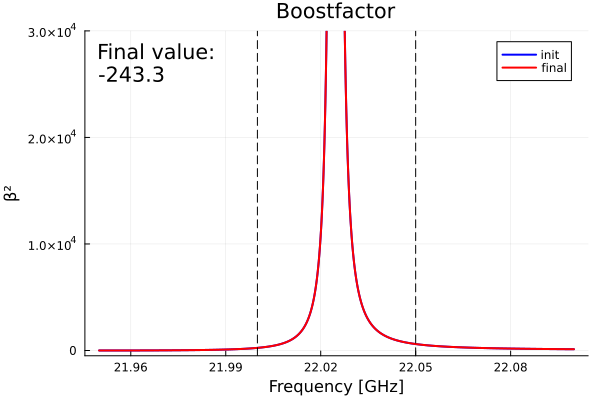

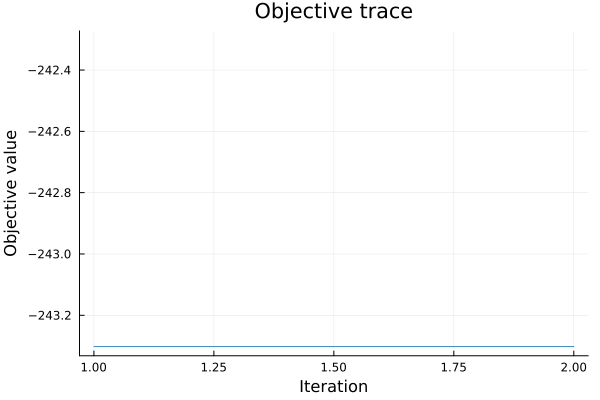

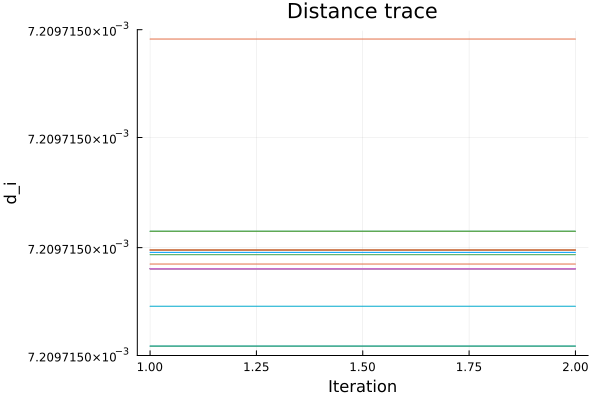

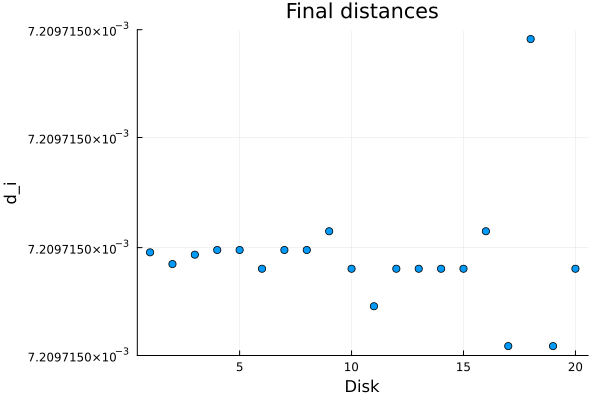

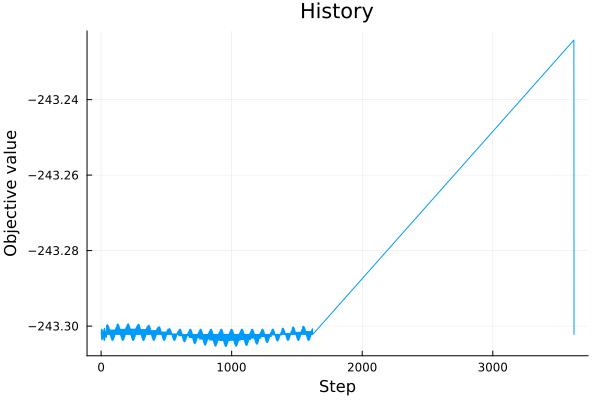

GKS: Possible loss of precision in routine SET_WINDOW


(Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})

In [31]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")